# Classification

In [2]:
from holisticai.datasets import load_dataset
from holisticai.utils import BinaryClassificationProxy, concatenate_metrics
from holisticai.explainability.metrics import surrogate as surrogate_metrics
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

feature_names = list(train['X'].columns)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {}

model = RandomForestClassifier()
model.fit(train['X'], train['y'])
models["RandomForestClassifier"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

model = XGBClassifier()
model.fit(train['X'], train['y'])
models["XGBClassifier"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

model = LogisticRegression(solver='liblinear')
model.fit(train['X'], train['y'])
models["LogisticRegression"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

model = MLPClassifier()
model.fit(train['X'], train['y'])
models["MLPClassifier"] = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

/home/cristian/.local/share/hatch/env/virtual/holisticai/4NjQH6EQ/testing/lib/python3.11/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [5]:
from sklearn.metrics import accuracy_score
from holisticai.utils import BinaryClassificationSurrogate

results = {}
surrogates = {}
for model_name,model in models.items():

    y_pred = model.predict(train['X'])
    acc = accuracy_score(train['y'], y_pred)

    metrics, surrogate = surrogate_metrics.classification_explainability_metrics(train['X'], train['y'], y_pred, surrogate_type="shallow_tree", metric_type="performance", return_surrogate_model=True)
    metrics.at['Accuracy', 'Value'] = acc
    metrics.at['Accuracy', 'Reference'] = 1
    results[model_name] = metrics
    surrogates[model_name] = surrogate

concatenate_metrics(results)    

,RandomForestClassifier,XGBClassifier,LogisticRegression,MLPClassifier,Reference
Accuracy Difference,0.18021,0.101050,-0.000221,-0.011388,0.0
Surrogate Accuracy,0.81979,0.870426,0.982753,0.981537,1.0
Accuracy,1.00000,0.920840,0.795909,0.786622,1.0


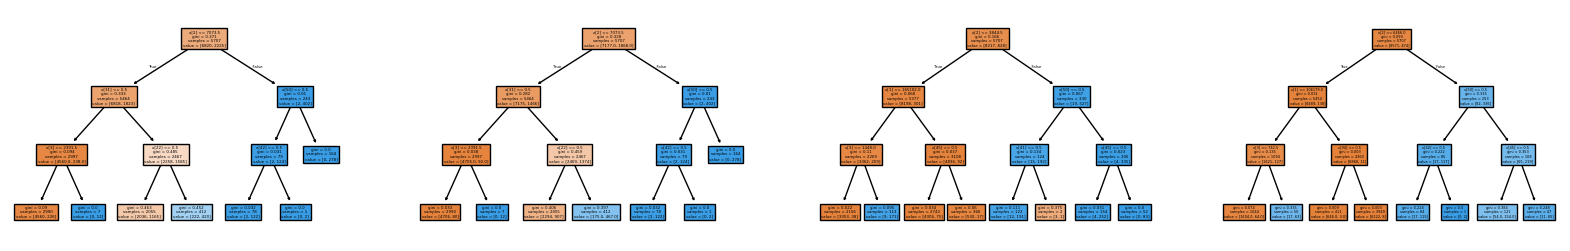

In [6]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,3))

for i,(model_name,surrogate) in enumerate(surrogates.items()):
    plt.subplot(1,len(surrogates),i+1)
    plt.title(model_name)
    _ = plot_tree(surrogate._surrogate, filled=True)

In [7]:
results = {}
surrogates = {}
for model_name,model in models.items():
    
    y_pred = model.predict(train['X'])
    acc = accuracy_score(train['y'], y_pred)

    metrics, surrogate = surrogate_metrics.classification_explainability_metrics(train['X'], train['y'], y_pred, surrogate_type="tree", metric_type="all", return_surrogate_model=True)

    metrics.at['Accuracy', 'Value'] = acc
    metrics.at['Accuracy', 'Reference'] = 1

    results[model_name] = metrics
    surrogates[model_name] = surrogate

concatenate_metrics(results)    

,RandomForestClassifier,XGBClassifier,LogisticRegression,MLPClassifier,Reference
Accuracy Difference,0.067109,0.025428,0.000995,-0.000774,0.0
Surrogate Accuracy,0.932891,0.965285,0.994362,0.995246,1.0
Features Stability,0.829534,0.820655,0.647787,0.697197,1.0
Feature Importances Stability,0.855406,0.934783,0.995861,0.994033,1.0
Spread Divergence,0.321749,0.301043,0.115706,0.121612,0.0
Number of Features,79.000000,72.000000,50.000000,46.000000,1.0
Number of Rules,1648.000000,960.000000,201.000000,149.000000,1.0
Tree Depth Variance,122.262695,46.231732,37.388035,12.533850,0.0
Weighted Average Explainability Score,19.321654,13.574032,8.887609,9.038615,0.0
Weighted Average Depth,21.090224,14.589276,10.959162,10.733693,0.0


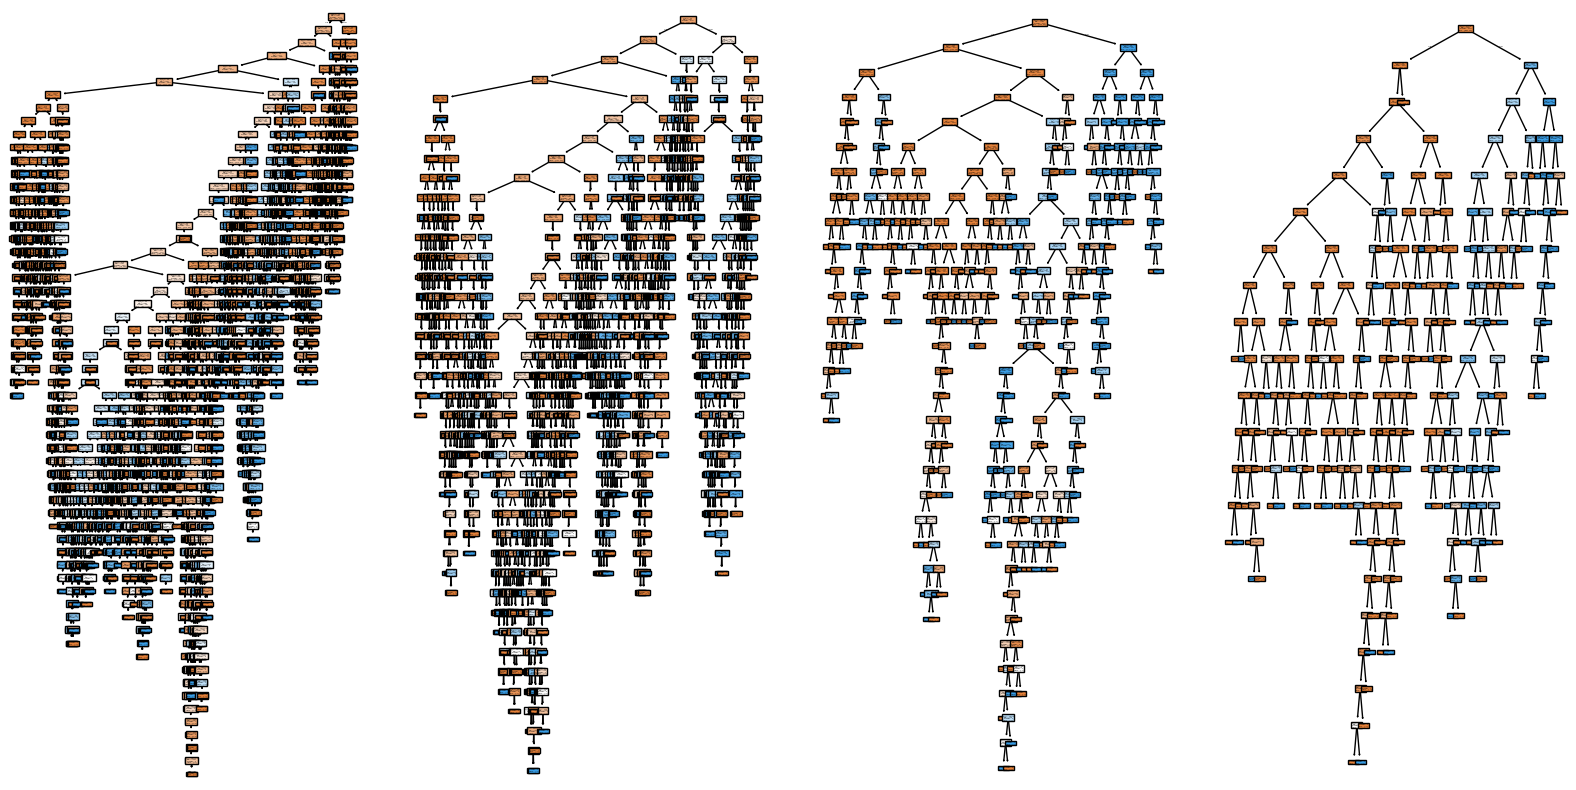

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))

for i,(model_name,surrogate) in enumerate(surrogates.items()):
    plt.subplot(1,len(surrogates),i+1)
    plt.title(model_name)
    _ = plot_tree(surrogate._surrogate, filled=True)